In [1]:
import jeans 
import numpy as np
import matplotlib.pyplot as plt

# Test velocity dependence

In [2]:
# velocity-independent case
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.8
rm = 20
GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1

# Example baryonic potential: Miyamoto-Nagai disk
# def Phi_b(r, th):
#     Md = 6.4e10
#     a = 3.5
#     b = 0.53
#     return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)


profile = jeans.squashed(rm, M200, c, q0=q0, Phi_b=None)

if profile:
    print("Profile generated successfully")

compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.003 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 1.591 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.000 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.967 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.968 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 1.577 seconds.
Profile generated successfully


In [3]:
# velocity-dependent case
v0, sigma0 = 200.0, 1.0  # km/s, cm^2/g
def sigma_v(v):
    return sigma0 * (v0 / np.maximum(v, 1e-6))**3


profile_vdep = jeans.squashed(rm, M200, c, q0=q0, Phi_b=None, sigma_v=sigma_v)

compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.005 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 1.896 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.001 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.890 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.890 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 27.613 seconds.


In [4]:
profile_vdep.cross_section()

(np.float64(1.205230523964414), 353.3659457455015)

In [5]:
profile.cross_section()

np.float64(1.2052305239644143)

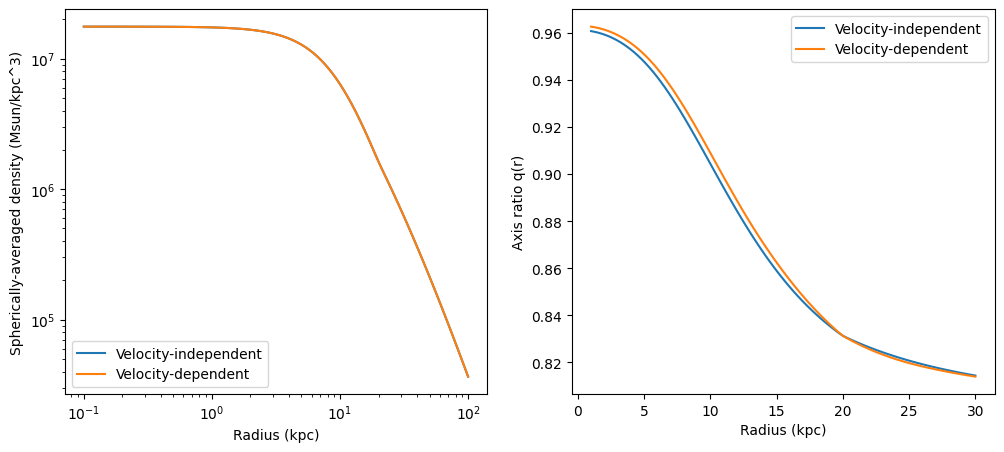

In [6]:
# plot to check 
rd = np.logspace(-1, 2, 100)
rq = np.linspace(1, 30, 100)

# plot density and shape side by side 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].loglog(rd, profile.rho_sph_avg(rd), label='Velocity-independent')
ax[0].loglog(rd, profile_vdep.rho_sph_avg(rd), label='Velocity-dependent')
ax[0].set_xlabel('Radius (kpc)')
ax[0].set_ylabel('Spherically-averaged density (Msun/kpc^3)')
ax[0].legend()
ax[1].plot(rq, profile.q(rq), label='Velocity-independent')
# vdq = [profile_vdep.q(ri) for ri in rq]
ax[1].plot(rq, profile_vdep.q(rq), label='Velocity-dependent')
ax[1].set_xlabel('Radius (kpc)')
ax[1].set_ylabel('Axis ratio q(r)')
ax[1].legend()

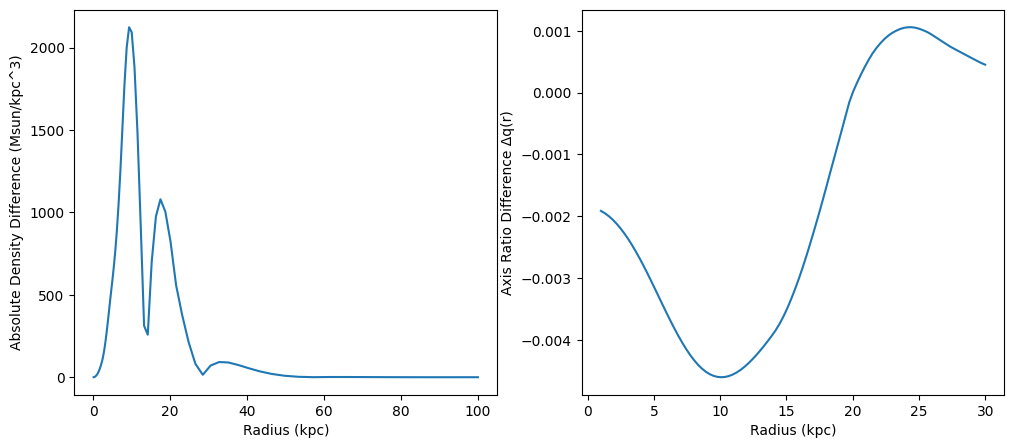

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
density_difference = profile.rho_sph_avg(rd) - profile_vdep.rho_sph_avg(rd)
ax[0].plot(rd, np.abs(density_difference))
ax[0].set_xlabel('Radius (kpc)')
ax[0].set_ylabel('Absolute Density Difference (Msun/kpc^3)')

shape_difference = profile.q(rq) - profile_vdep.q(rq)
ax[1].plot(rq, shape_difference)
ax[1].set_xlabel('Radius (kpc)')
ax[1].set_ylabel('Axis Ratio Difference Δq(r)')
plt.show()

In [8]:
print(profile_vdep.N(10))  # example usage of N(r)
print(profile_vdep.nu(10))  # example usage of nu(r)
print(profile_vdep.mean_sigv(10))  # example usage of mean_sigv(r)

4.27041744953869
106.39412538250991
353.3659457455015


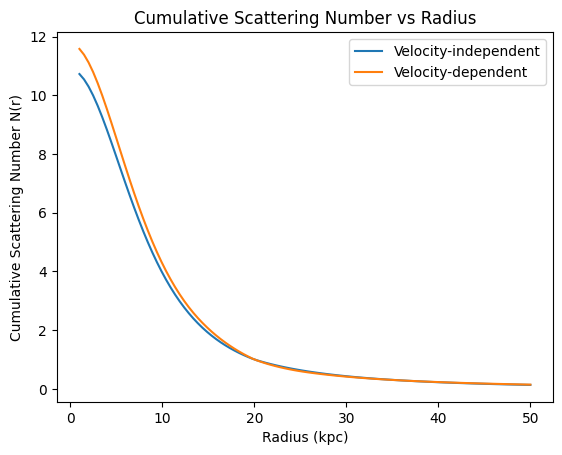

In [10]:
r_list = np.linspace(1,50,100)
N_list_v = [profile_vdep.N(r) for r in r_list]
N_list = [profile.N(r) for r in r_list]

plt.plot(r_list, N_list, label='Velocity-independent')
plt.plot(r_list, N_list_v, label='Velocity-dependent')
plt.xlabel('Radius (kpc)')
plt.ylabel('Cumulative Scattering Number N(r)')
plt.title('Cumulative Scattering Number vs Radius')
plt.legend()
plt.show()

In [3]:
# --- your velocity-dependent law (p = -2) ---
v0, sigma0 = 200.0, 1.0  # km/s, cm^2/g
def sigma_v(v): return sigma0 * (v0 / np.maximum(v, 1e-6))**2

# --- choose your existing rm and q0; keep Phi_b=None to isolate halo physics ---
# (If you already have rm, q0 in scope, just reuse them.)
# rm = ...               # your matching radius choice
# q0 = ...               # your outer-halo shape (constant)
Phi_b = None
rm=10
q0=0.8

# --- three halos ---
ladder = [
    dict(name="dwarf",   M200=1e10, c=16.0),
    dict(name="milkyw",  M200=1e12, c=10.0),
    dict(name="cluster", M200=1e14, c=4.0),
]

# build profiles with velocity dependence
profiles_vdep = []
for H in ladder:
    prof = jeans.squashed(rm, H["M200"], H["c"], q0=q0, Phi_b=Phi_b, sigma_v=sigma_v)
    if prof:
        profiles_vdep.append((H["name"], prof))
        print(f"Built velocity-dependent profile for {H['name']} halo.")
    else:
        print(f"Failed to build profile for {H['name']} halo.")
   

# build constant-σ control for the middle halo (MW)
name_mid, prof_mid_vdep = profiles_vdep[1]
prof_mid_const = jeans.squashed(rm, 1e12, 10.0, q0=q0, Phi_b=Phi_b, sigma_v=None)

compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.002 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 2.322 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.001 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.518 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.518 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 19.482 seconds.
Built velocity-dependent profile for dwarf halo.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.003 seconds.
relaxation (in /home/asorlik/Deskto

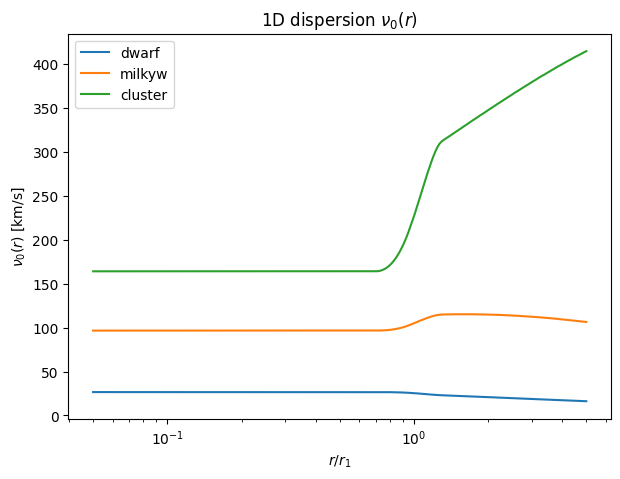

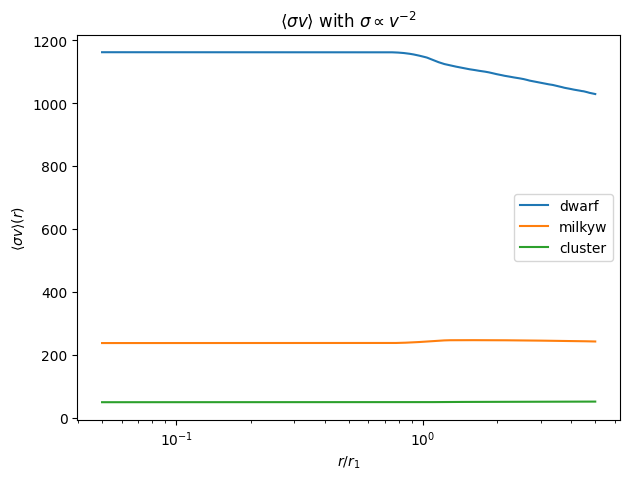

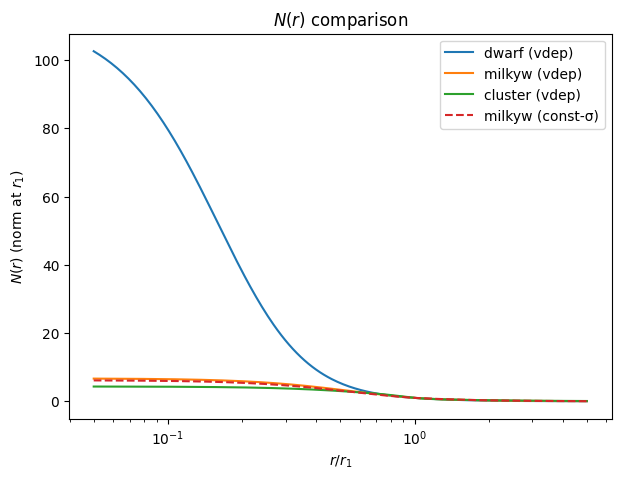

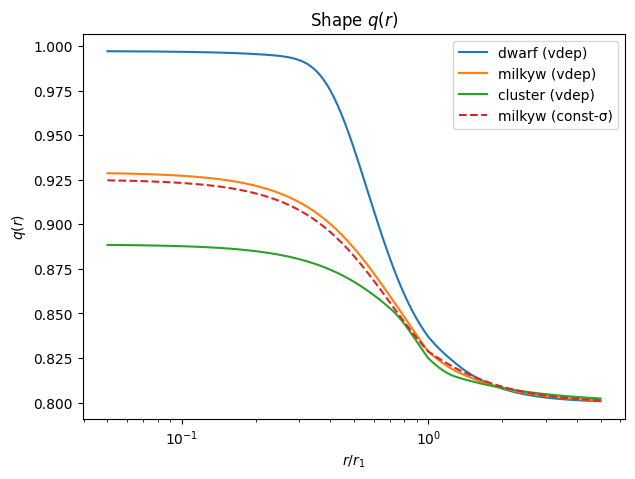

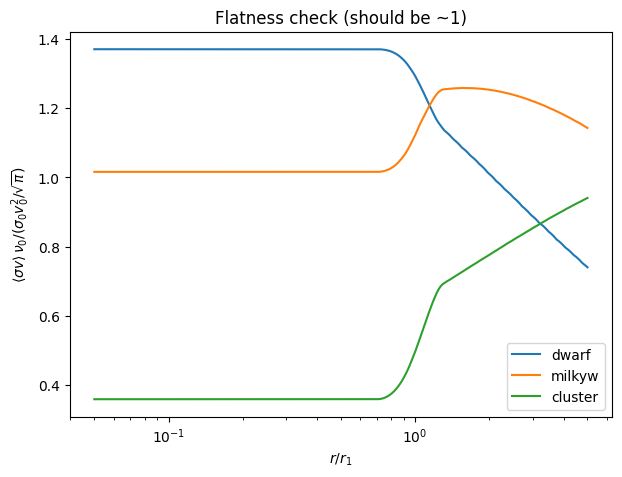

In [8]:
# --- radial grid relative to each halo's r1 for fair comparisons ---
def halo_grid(prof, n=256, lo=0.05, hi=5.0):
    r1 = prof.r1
    r  = np.geomspace(lo*r1, hi*r1, n)
    return r, r1

# 1) ν0(r)
plt.figure(figsize=(7,5))
for name, prof in profiles_vdep:
    r, r1 = halo_grid(prof)
    nu = prof.nu(r)  # exposed earlier
    plt.plot(r/r1, nu, label=name)
plt.xscale('log'); plt.xlabel(r'$r/r_1$'); plt.ylabel(r'$\nu_0(r)\ \rm [km/s]$'); plt.legend(); plt.title(r'1D dispersion $\nu_0(r)$');

# 2) <σ v>(r)
plt.figure(figsize=(7,5))
for name, prof in profiles_vdep:
    r, r1 = halo_grid(prof)
    nu = prof.nu(r)
    sigv = np.array([prof.mean_sigv(float(x)) for x in nu])
    plt.plot(r/r1, sigv, label=name)
plt.xscale('log'); plt.xlabel(r'$r/r_1$'); plt.ylabel(r'$\langle\sigma v\rangle(r)$'); plt.legend(); plt.title(r'$\langle\sigma v\rangle$ with $\sigma\propto v^{-2}$');

# 3) N(r): ladder (vdep) + MW control (const vs vdep)
plt.figure(figsize=(7,5))
for name, prof in profiles_vdep:
    r, r1 = halo_grid(prof)
    N = np.array([prof.N(ri) for ri in r])
    plt.plot(r/r1, N, label=f'{name} (vdep)')
# MW control overlay
r_mid, r1_mid = halo_grid(prof_mid_vdep)
N_mid_v = np.array([prof_mid_vdep.N(ri) for ri in r_mid])
N_mid_c = np.array([prof_mid_const.N(ri) for ri in r_mid])
plt.plot(r_mid/r1_mid, N_mid_c, '--', label='milkyw (const-σ)')
plt.xscale('log'); plt.xlabel(r'$r/r_1$'); plt.ylabel(r'$N(r)$ (norm at $r_1$)'); plt.legend(); plt.title(r'$N(r)$ comparison');

# 4) q(r): ladder (vdep) + MW control
plt.figure(figsize=(7,5))
for name, prof in profiles_vdep:
    r, r1 = halo_grid(prof)
    q = prof.q(r)
    plt.plot(r/r1, q, label=f'{name} (vdep)')
# MW control overlay
q_mid_v = prof_mid_vdep.q(r_mid)
q_mid_c = prof_mid_const.q(r_mid)
plt.plot(r_mid/r1_mid, q_mid_c, '--', label='milkyw (const-σ)')
plt.xscale('log'); plt.xlabel(r'$r/r_1$'); plt.ylabel(r'$q(r)$'); plt.legend(); plt.title(r'Shape $q(r)$');

# (optional) Flatness check for p=-2: <σv>*ν0 ≈ const vs r
plt.figure(figsize=(7,5))
for name, prof in profiles_vdep:
    r, r1 = halo_grid(prof)
    nu = prof.nu(r)
    sigv = np.array([prof.mean_sigv(float(x)) for x in nu])
    plt.plot(r/r1, sigv*nu/(sigma0*v0**2/np.sqrt(np.pi)), label=name)
plt.xscale('log'); plt.xlabel(r'$r/r_1$'); plt.ylabel(r'$\langle\sigma v\rangle\,\nu_0 / (\sigma_0 v_0^2/\sqrt{\pi})$'); plt.legend(); plt.title('Flatness check (should be ~1)');

plt.show()


In [10]:
profiles_vdep

[('dwarf', <jeans.classes.profile at 0x7fc0d92d2ad0>),
 ('milkyw', <jeans.classes.profile at 0x7fc158794fc0>),
 ('cluster', <jeans.classes.profile at 0x7fc0d8b017f0>)]

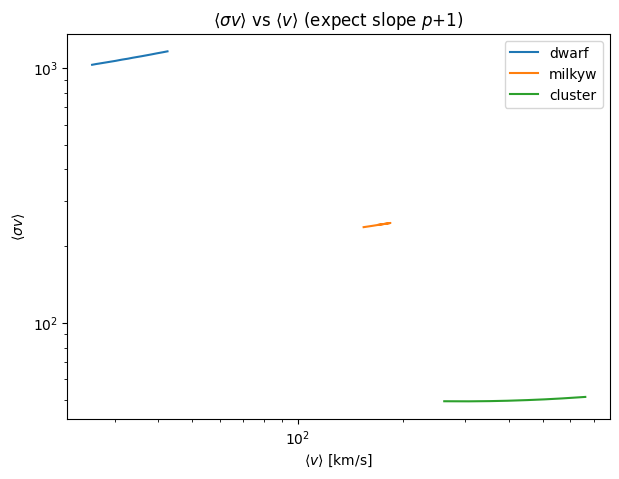

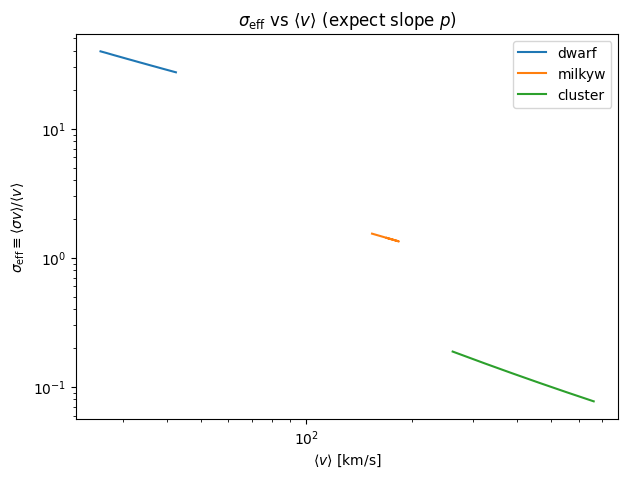

In [13]:
A = 2.0*np.sqrt(2.0/np.pi)  # ⟨v⟩ = A * ν0

def halo_grid(prof, n=256, lo=0.05, hi=5.0):
    r1 = prof.r1
    return np.geomspace(lo*r1, hi*r1, n), r1

def collect_curve(prof):
    r, r1 = halo_grid(prof)
    nu  = prof.nu(r)
    vbar = A * nu                                 # ⟨v⟩(r)
    sigv = np.array([prof.mean_sigv(float(x)) for x in nu])  # ⟨σv⟩(r)
    sig_eff = sigv / np.maximum(vbar, 1e-12)      # σ_eff(⟨v⟩)
    return vbar, sigv, sig_eff

curves = []
for name, prof in profiles_vdep:
    vbar, sigv, sig_eff = collect_curve(prof)
    curves.append((name, vbar, sigv, sig_eff))

# 1) <σv> vs <v>
plt.figure(figsize=(7,5))
for name, vbar, sigv, _ in curves:
    plt.plot(vbar, sigv, label=name)
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$\langle v\rangle\ \mathrm{[km/s]}$'); plt.ylabel(r'$\langle\sigma v\rangle$')
plt.title(r'$\langle\sigma v\rangle$ vs $\langle v\rangle$ (expect slope $p{+}1$)')
plt.legend()

# 2) σ_eff ≡ <σv>/<v> vs <v>
plt.figure(figsize=(7,5))
for name, vbar, _, sig_eff in curves:
    plt.plot(vbar, sig_eff, label=name)
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$\langle v\rangle\ \mathrm{[km/s]}$'); plt.ylabel(r'$\sigma_{\rm eff} \equiv \langle\sigma v\rangle/\langle v\rangle$')
plt.title(r'$\sigma_{\rm eff}$ vs $\langle v\rangle$ (expect slope $p$)')
plt.legend()
plt.show()

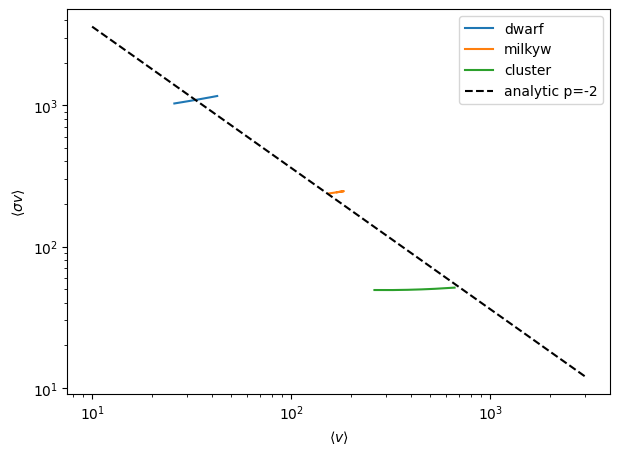

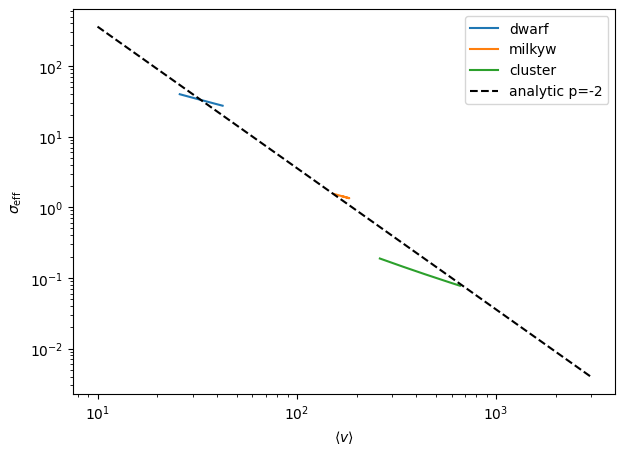

In [14]:
K = (2.0*np.sqrt(2.0)/np.pi) * sigma0 * v0**2  # same sigma0,v0 you used
vref = np.geomspace(10, 3000, 200)

plt.figure(figsize=(7,5))
for name, vbar, sigv, _ in curves: plt.plot(vbar, sigv, label=name)
plt.plot(vref, K/np.maximum(vref,1e-12), 'k--', label='analytic p=-2')
plt.xscale('log'); plt.yscale('log'); plt.xlabel(r'$\langle v\rangle$'); plt.ylabel(r'$\langle\sigma v\rangle$'); plt.legend()

plt.figure(figsize=(7,5))
for name, vbar, _, sig_eff in curves: plt.plot(vbar, sig_eff, label=name)
plt.plot(vref, K/np.maximum(vref,1e-12)**2, 'k--', label='analytic p=-2')
plt.xscale('log'); plt.yscale('log'); plt.xlabel(r'$\langle v\rangle$'); plt.ylabel(r'$\sigma_{\rm eff}$'); plt.legend()
plt.show()


In [16]:
for name, prof in profiles_vdep:
    print(f"Profile: {name}")
    print(f"Effective cross section is: {prof.cross_section()[0]} cm^2/g")

Profile: dwarf
Effective cross section is: 30.269277413675617 cm^2/g
Profile: milkyw
Effective cross section is: 0.3771416837115507 cm^2/g
Profile: cluster
Effective cross section is: 0.08002735691771654 cm^2/g


# Test saving

In [4]:
filename = "example_profile.npz"
profile.save(filename)

In [5]:
new_profile = jeans.load(filename)

In [6]:
new_profile.outer.alpha

0.3

In [12]:
profile.outer.halo_type

'Einasto'

# Plotting

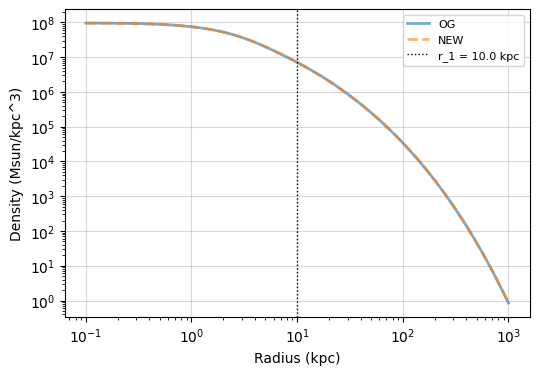

In [7]:

r = np.logspace(-1,3, num=100)

plt.figure(figsize=(6,4))
plt.loglog(r, profile.rho_sph_avg(r), label='OG', c='C0', alpha=0.6, ls='-', lw=2)
plt.loglog(r, new_profile.rho_sph_avg(r), label='NEW',  c='C1', alpha=0.6, ls='--', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)
plt.show()

In [3]:
r = np.logspace(-1,3, num=30)

check = profile.q_from_force(r, Lmax=0)

print(check)

(array([  6.48286692,   9.95629278,  14.18192116,  19.7103748 ,
        27.11520459,  37.07100957,  50.36073497,  67.79413133,
        89.94559661, 116.57896602, 145.78145595, 173.49237959,
       194.84577065, 207.33557092, 212.49851374, 214.04081592,
       214.48779743, 214.44805849, 213.31520454, 210.05979412,
       203.83581758, 194.26343431, 181.50460275, 166.19890263,
       149.30897893, 131.91061949, 114.98643866,  99.2690792 ,
        85.17643759,  72.84073821]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))


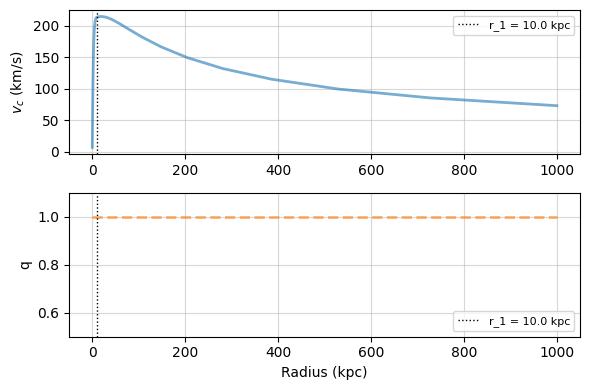

In [4]:
vc, q = check

plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.plot(r, vc, c='C0', alpha=0.6, ls='-', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.ylabel('$v_c$ (km/s)')
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)

plt.subplot(2,1,2)
plt.plot(r, q, c='C1', alpha=0.6, ls='--', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.xlabel('Radius (kpc)')
plt.ylabel('q')
plt.ylim(0.5,1.1)
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

# Plotting Einasto and Jeans profiles

In [42]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.8
GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1

# # Example baryonic potential: Miyamoto-Nagai disk
# def Phi_b(r, th):
#     Md = 6.4e10
#     a = 3.5
#     b = 0.53
#     return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

Phi_b = None 

# pure Einasto profile 
try:
    profile_E = jeans.cdm(M200, c, alpha=0.3, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating profile: {e}")

# squashed Einasto profile
rm_E = 1 
alpha1 = 0.15
try:
    profile_E_s1 = jeans.squashed(rm_E, M200, c, alpha=alpha1, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating squashed profile: {e}")
    
alpha2 = 0.91 # Ou paper fit
try:
    profile_E_s2 = jeans.squashed(rm_E, M200, c, alpha=alpha2, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating squashed profile 2: {e}")    

# Squashed jeans profile
rm_s1 = 1
try:
    profile_s1 = jeans.squashed(rm_s1, M200, c, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating s1 profile: {e}")

rm_s2 = 60
try:
    profile_s2 = jeans.squashed(rm_s2, M200, c, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating s2 profile: {e}")


compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.150 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.004 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 1.958 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.001 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.884 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.884 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 1.359 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-

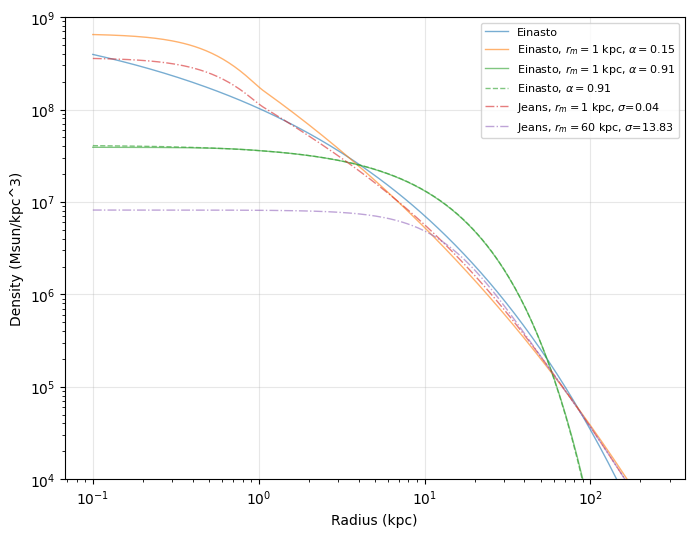

In [44]:
# plot the density profile first 
r = np.geomspace(0.1,250, num=200)

plt.figure(figsize=(8,6))
plt.loglog(r, profile_E.rho_sph_avg(r), label='Einasto', c='C0', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s1.rho_sph_avg(r), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha1}$', c='C1', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s2.rho_sph_avg(r), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s2.outer.rho_sph_avg(r), label=f'Einasto, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='--', lw=1)
plt.loglog(r, profile_s1.rho_sph_avg(r), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}', c='C3', alpha=0.6, ls='-.', lw=1)
plt.loglog(r, profile_s2.rho_sph_avg(r), label=f'Jeans, $r_m={rm_s2}$ kpc, $\\sigma$={profile_s2.cross_section():.2f}', c='C4', alpha=0.6, ls='-.', lw=1)
plt.ylim(1e4, 1e9)
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()

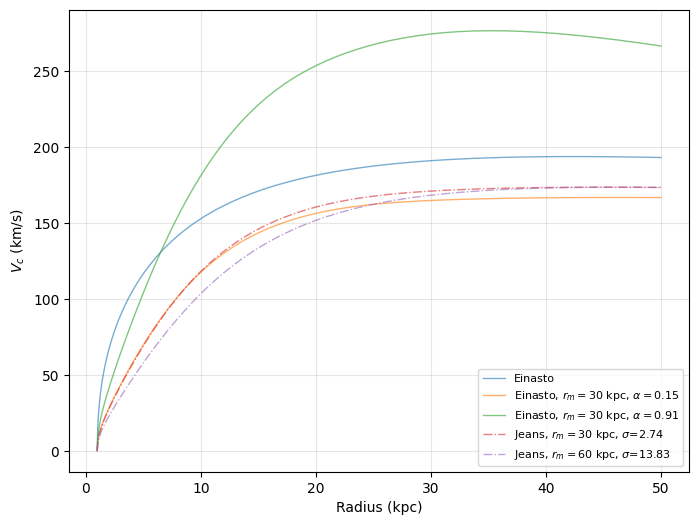

In [34]:
# plot the density profile first 
r = np.geomspace(1,50, num=100)

plt.figure(figsize=(8,6))
plt.plot(r, profile_E.V(r, Lmax=0), label='Einasto', c='C0', alpha=0.6, ls='-', lw=1)   
plt.plot(r, profile_E_s1.V(r, Lmax=0), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha1}$', c='C1', alpha=0.6, ls='-', lw=1)
plt.plot(r, profile_E_s2.V(r, Lmax=0), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='-', lw=1)
plt.plot(r, profile_s1.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}', c='C3', alpha=0.6, ls='-.', lw=1)
plt.plot(r, profile_s2.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s2}$ kpc, $\\sigma$={profile_s2.cross_section():.2f}', c='C4', alpha=0.6, ls='-.', lw=1)


plt.xlabel('Radius (kpc)')
plt.ylabel('$V_c$ (km/s)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()

In [37]:
vc_s1_L4 = profile_s1.V(r, Lmax=4)

/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/classes.py:488: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.Vsq(r, Lmax=Lmax))


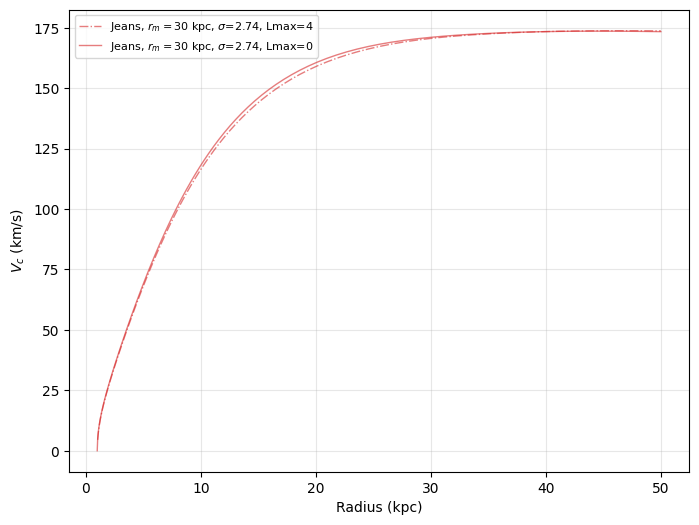

In [38]:
plt.figure(figsize=(8,6))
plt.plot(r, vc_s1_L4, label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}, Lmax=4', c='C3', alpha=0.6, ls='-.', lw=1)
plt.plot(r, profile_s1.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}, Lmax=0', c='C3', alpha=0.6, ls='-', lw=1)
plt.xlabel('Radius (kpc)')
plt.ylabel('$V_c$ (km/s)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()

# Einasto and Jeans with Baryons

In [39]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.8
GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

# Phi_b = None 

# pure Einasto profile 
try:
    profile_E = jeans.cdm(M200, c, alpha=0.3, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating profile: {e}")

# squashed Einasto profile
rm_E = 30 
alpha1 = 0.15
try:
    profile_E_s1 = jeans.squashed(rm_E, M200, c, alpha=alpha1, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating squashed profile: {e}")
    
alpha2 = 0.91 # Ou paper fit
try:
    profile_E_s2 = jeans.squashed(rm_E, M200, c, alpha=alpha2, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating squashed profile 2: {e}")    

# Squashed jeans profile
rm_s1 = 30 
try:
    profile_s1 = jeans.squashed(rm_s1, M200, c, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating s1 profile: {e}")

# rm_s2 = 60
# try:
#     profile_s2 = jeans.squashed(rm_s2, M200, c, q0=q0, Phi_b=Phi_b)
# except Exception as e:
#     print(f"Error generating s2 profile: {e}")

compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.150 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.170 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 2.305 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.370 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 2.689 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 2.689 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 2.568 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-

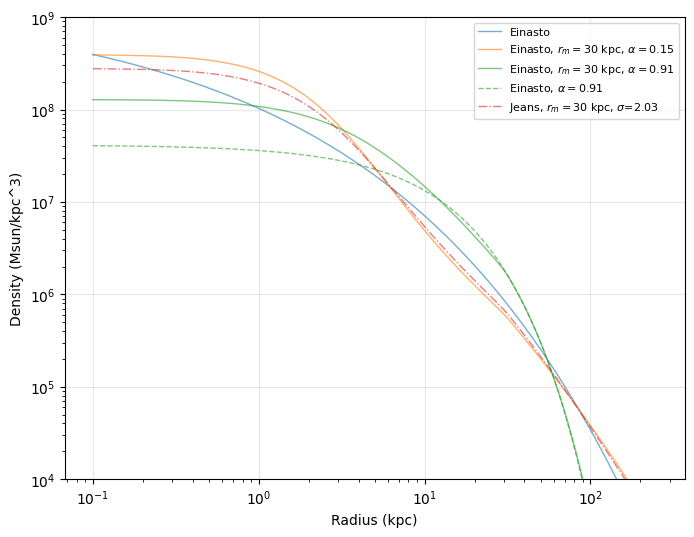

In [40]:
# plot the density profile first 
r = np.geomspace(0.1,250, num=200)

plt.figure(figsize=(8,6))
plt.loglog(r, profile_E.rho_sph_avg(r), label='Einasto', c='C0', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s1.rho_sph_avg(r), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha1}$', c='C1', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s2.rho_sph_avg(r), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s2.outer.rho_sph_avg(r), label=f'Einasto, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='--', lw=1)
plt.loglog(r, profile_s1.rho_sph_avg(r), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}', c='C3', alpha=0.6, ls='-.', lw=1)
# plt.loglog(r, profile_s2.rho_sph_avg(r), label=f'Jeans, $r_m={rm_s2}$ kpc, $\\sigma$={profile_s2.cross_section():.2f}', c='C4', alpha=0.6, ls='-.', lw=1)
plt.ylim(1e4, 1e9)
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()

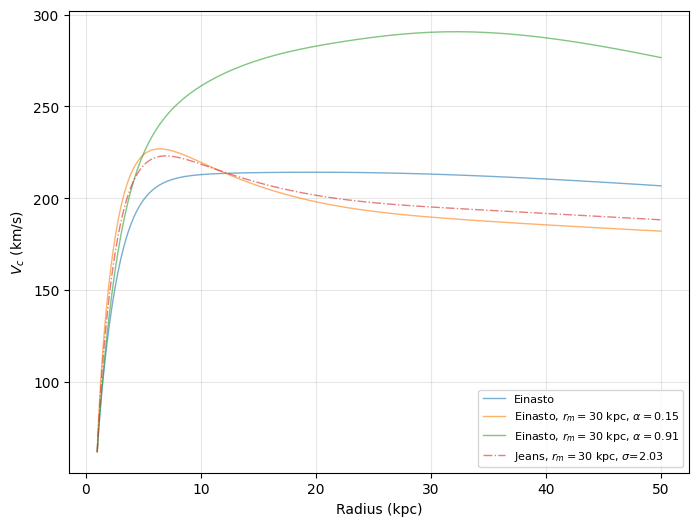

In [41]:
# plot the density profile first 
r = np.geomspace(1,50, num=100)

plt.figure(figsize=(8,6))
plt.plot(r, profile_E.V(r, Lmax=0), label='Einasto', c='C0', alpha=0.6, ls='-', lw=1)   
plt.plot(r, profile_E_s1.V(r, Lmax=0), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha1}$', c='C1', alpha=0.6, ls='-', lw=1)
plt.plot(r, profile_E_s2.V(r, Lmax=0), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='-', lw=1)
plt.plot(r, profile_s1.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}', c='C3', alpha=0.6, ls='-.', lw=1)
# plt.plot(r, profile_s2.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s2}$ kpc, $\\sigma$={profile_s2.cross_section():.2f}', c='C4', alpha=0.6, ls='-.', lw=1)


plt.xlabel('Radius (kpc)')
plt.ylabel('$V_c$ (km/s)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()